# Problem Statement:

# create a Realistic Dummy DATAset


In [1]:
# Import necessary libraries
import pandas as pd

# Create a realistic dummy dataset with 6 features for an e-commerce platform
data = {
    'Session_Duration': [23, 45, 15, 67, 34, 23, 56, 23, 45, 12, 24, 38, 25, 32, 64, 58, 45, 43, 47, 52],
    'Pages_Visited': [5, 8, 2, 10, 7, 5, 9, 4, 6, 2, 5, 7, 3, 5, 9, 10, 8, 7, 6, 9],
    'Items_in_Cart': [3, 6, 1, 9, 4, 3, 7, 2, 5, 1, 4, 5, 2, 4, 8, 9, 7, 6, 5, 8],
    'Avg_Session_Value': [100, 300, 80, 450, 200, 110, 390, 90, 250, 60, 110, 230, 100, 180, 400, 410, 360, 320, 310, 380],
    'Time_Spent_on_Site': [150, 180, 70, 230, 140, 120, 200, 90, 170, 60, 110, 160, 100, 130, 240, 250, 210, 190, 180, 220],
    'Purchase_History': [5, 12, 2, 15, 10, 5, 14, 4, 10, 2, 6, 11, 3, 7, 13, 14, 12, 10, 11, 13]
}

In [2]:
#convert the data to a dataframe 
df = pd.DataFrame(data)

In [3]:
df.head()

,Session_Duration,Pages_Visited,Items_in_Cart,Avg_Session_Value,Time_Spent_on_Site,Purchase_History
0,23,5,3,100,150,5
1,45,8,6,300,180,12
2,15,2,1,80,70,2
3,67,10,9,450,230,15
4,34,7,4,200,140,10


# Explanation of Feature:

# Import Required Libraires for clustering 

In [7]:
#import Libraries for clustering 

from sklearn.preprocessing import StandardScaler #mean = 0, std = 1
from sklearn.cluster import AgglomerativeClustering # Hierarchical clustering algorithm। 
                                                     #(bottom-up approach)
import matplotlib.pyplot as plt #make plot
import seaborn as sns #make nice graph 


#Standardize the data before clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


# Determine N of clusters using Dendogram

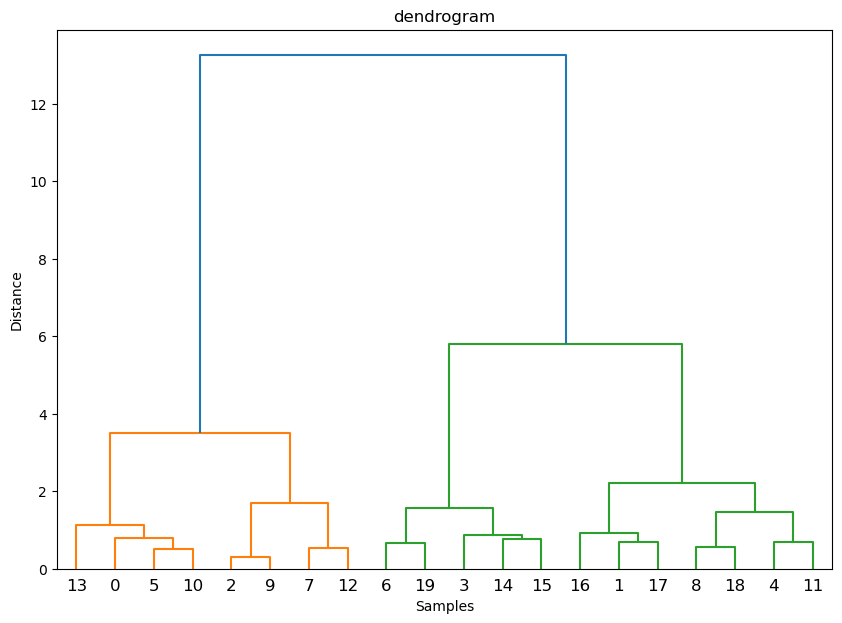

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage 
#Hierarchical clustering linkage matrix তৈরি করে। --- linkage
# একাধিক পয়েন্টকে কীভাবে মিলে গ্রুপ হবে, সেটার হিসাব করে। --linkage
# method='ward' = ক্লাস্টারিং-এর জন্য Ward's method ব্যবহার করা হয়েছে
# (যেটা ভ্যারিয়েন্স কমিয়ে ক্লাস্টার বানায়) ছড়াছড়ি সবচেয়ে কম হয়।

# linkage matrix is a 2D array
# where two cluster are merging
#how far is the marge 
#How many elements does that cluster consist of?


# dendrogram see graph or tree

#generate the linkage matrix using ward's method 
linked = linkage(scaled_data, method='ward')  # ← সঠিক



#plot the dendrogram
plt.figure(figsize=(10,7))
dendrogram(linked)
plt.title("dendrogram")
plt.xlabel('Samples')
plt.ylabel("Distance")
plt.show()



# Apply Agglomerative Clustering

In [27]:

#"Divide me into 2 groups in such a way,  -- n_clusters = 2
#that the variation within each group is minimal,  -- ward method 
#and the distance will be measured using the Euclidean rule." -- metric = euclidean


agg_clustering = AgglomerativeClustering(n_clusters = 2 , metric = 'euclidean' , linkage='ward')
cluster_labels = agg_clustering.fit_predict(scaled_data)


#add the cluster labels to the orginal dataframe
df['cluster'] = cluster_labels

#display the clustered data 
df.head()


,Session_Duration,Pages_Visited,Items_in_Cart,Avg_Session_Value,Time_Spent_on_Site,Purchase_History,cluster
0,23,5,3,100,150,5,1
1,45,8,6,300,180,12,0
2,15,2,1,80,70,2,1
3,67,10,9,450,230,15,0
4,34,7,4,200,140,10,0


# Dataset Analysis


# Suggested Names for Clusters

In [28]:
#assign cluster names
cluster_names = {0:'Premium Customers',1:'One-Time Browsers'}
df['cluster_name'] = df['cluster'].map(cluster_names)

In [30]:
df.head()

,Session_Duration,Pages_Visited,Items_in_Cart,Avg_Session_Value,Time_Spent_on_Site,Purchase_History,cluster,cluster_name
0,23,5,3,100,150,5,1,One-Time Browsers
1,45,8,6,300,180,12,0,Premium Customers
2,15,2,1,80,70,2,1,One-Time Browsers
3,67,10,9,450,230,15,0,Premium Customers
4,34,7,4,200,140,10,0,Premium Customers


# visualize the clustering result

<AxesSubplot: xlabel='Session_Duration', ylabel='Avg_Session_Value'>

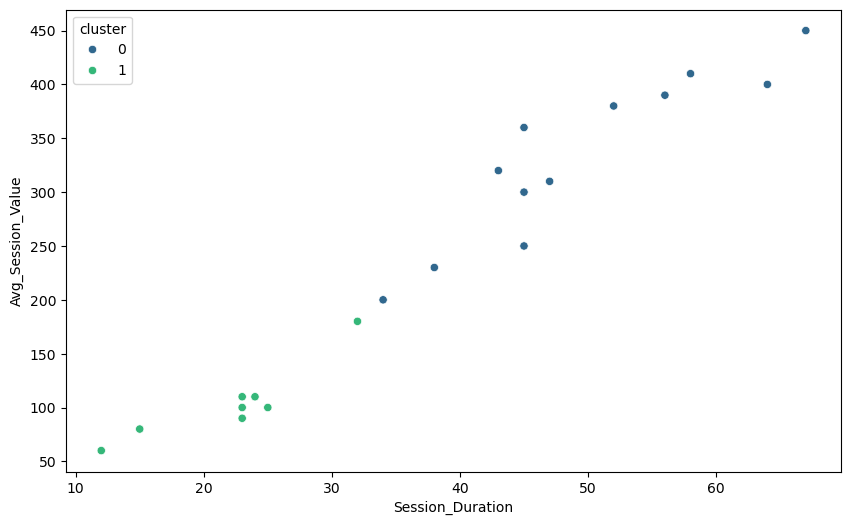

In [41]:
#visualize the clusters using a scatter plot 
#(e.g., based on Session_Duration and Avg_Session_Value)


plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Session_Duration'], y = df['Avg_Session_Value'],hue=df['cluster'],palette='viridis')